<a href="https://colab.research.google.com/github/Choesoohwan/CSH/blob/main/yolov8_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!nvidia-smi

Wed Feb 15 13:41:18 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P0    24W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.1/278.1 KB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.3/181.3 KB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 21.6 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [ ]:
!git clone https://github.com/ultralytics/ultralytics.git

Cloning into 'ultralytics'...
remote: Enumerating objects: 4674, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 4674 (delta 6), reused 12 (delta 3), pack-reused 4641
Receiving objects: 100% (4674/4674), 3.99 MiB | 18.30 MiB/s, done.
Resolving deltas: 100% (3074/3074), done.


In [ ]:
%cd /content

/content


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


install yolov8

In [ ]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.38 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Setup complete ✅ (4 CPUs, 25.5 GB RAM, 24.4/166.8 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

Inference Example with pretrained yolov8 model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
WARNING ⚠️ Ultralytics settings reset to defaults. 
This is normal and may be due to a recent ultralytics package update, but may have overwritten previous settings. 
You may view and update settings directly in '/root/.config/Ultralytics/settings.yaml'
Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs
100% 104k/104k [00:00<00:00, 28.4MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 14.1ms
Speed: 0.4ms pre-process, 14.1ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


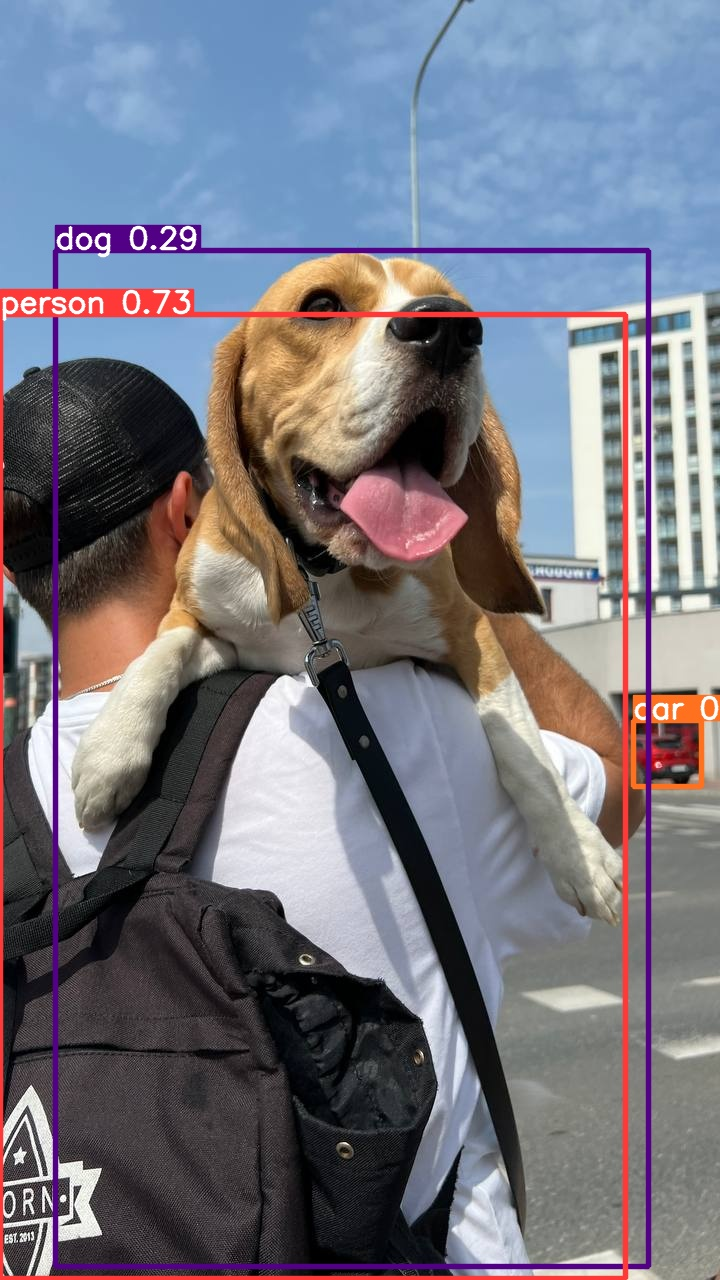

In [ ]:
Image(filename='/content/runs/detect/predict/dog.jpeg', height=600)

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="1D6VKClwcVxrY7vmVr35")
project = rf.workspace().project("tank_agumentation")
dataset = project.version(1).download("yolov5")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to tank_agumentation-1 in yolov5pytorch:: 100%|██████████| 1674/1674 [00:00<00:00, 6823.88it/s]


In [29]:
import shutil
shutil.rmtree('/content/runs')

In [27]:
!yolo task=detect mode=train model=yolov8s.pt data='/content/datasets/tank_agumentation-1/data.yaml' epochs=30 imgsz=640 plots=True

100% 21.5M/21.5M [00:00<00:00, 370MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/tank_agumentation-1/data.yaml, epochs=30, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False,

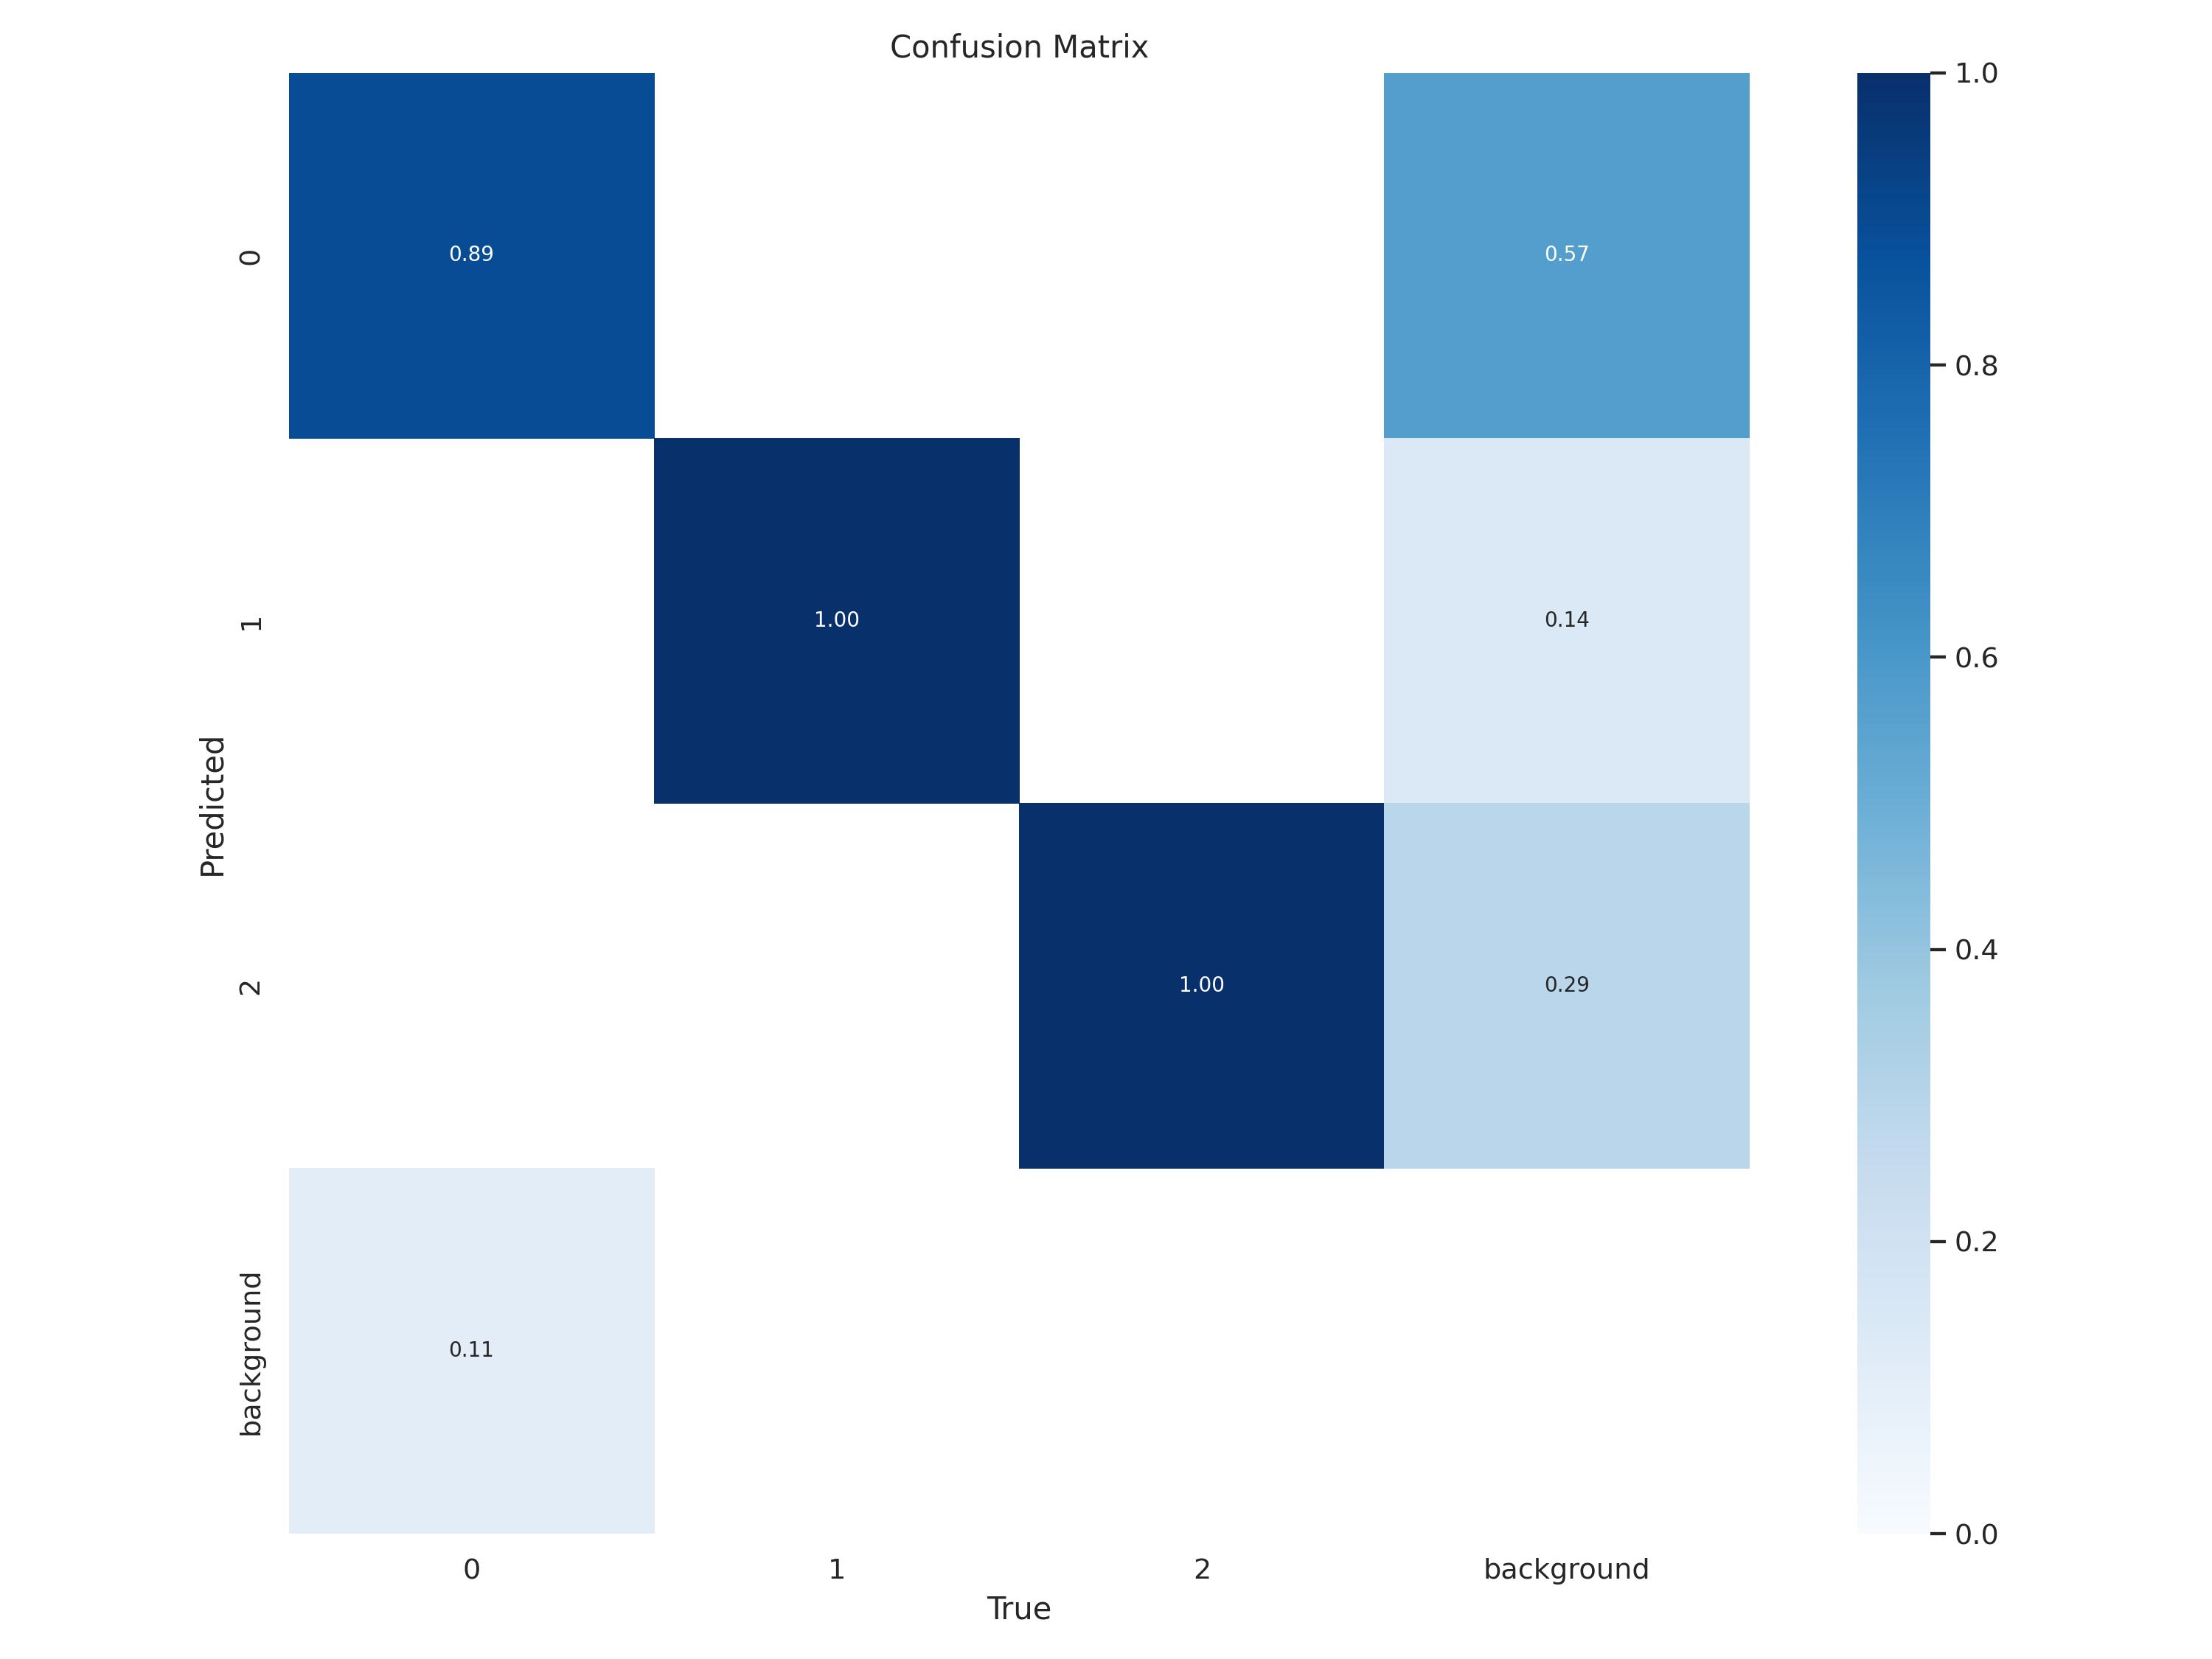

In [30]:
Image(filename=f'/content/datasets/runs/detect/train/confusion_matrix.png', width=600)

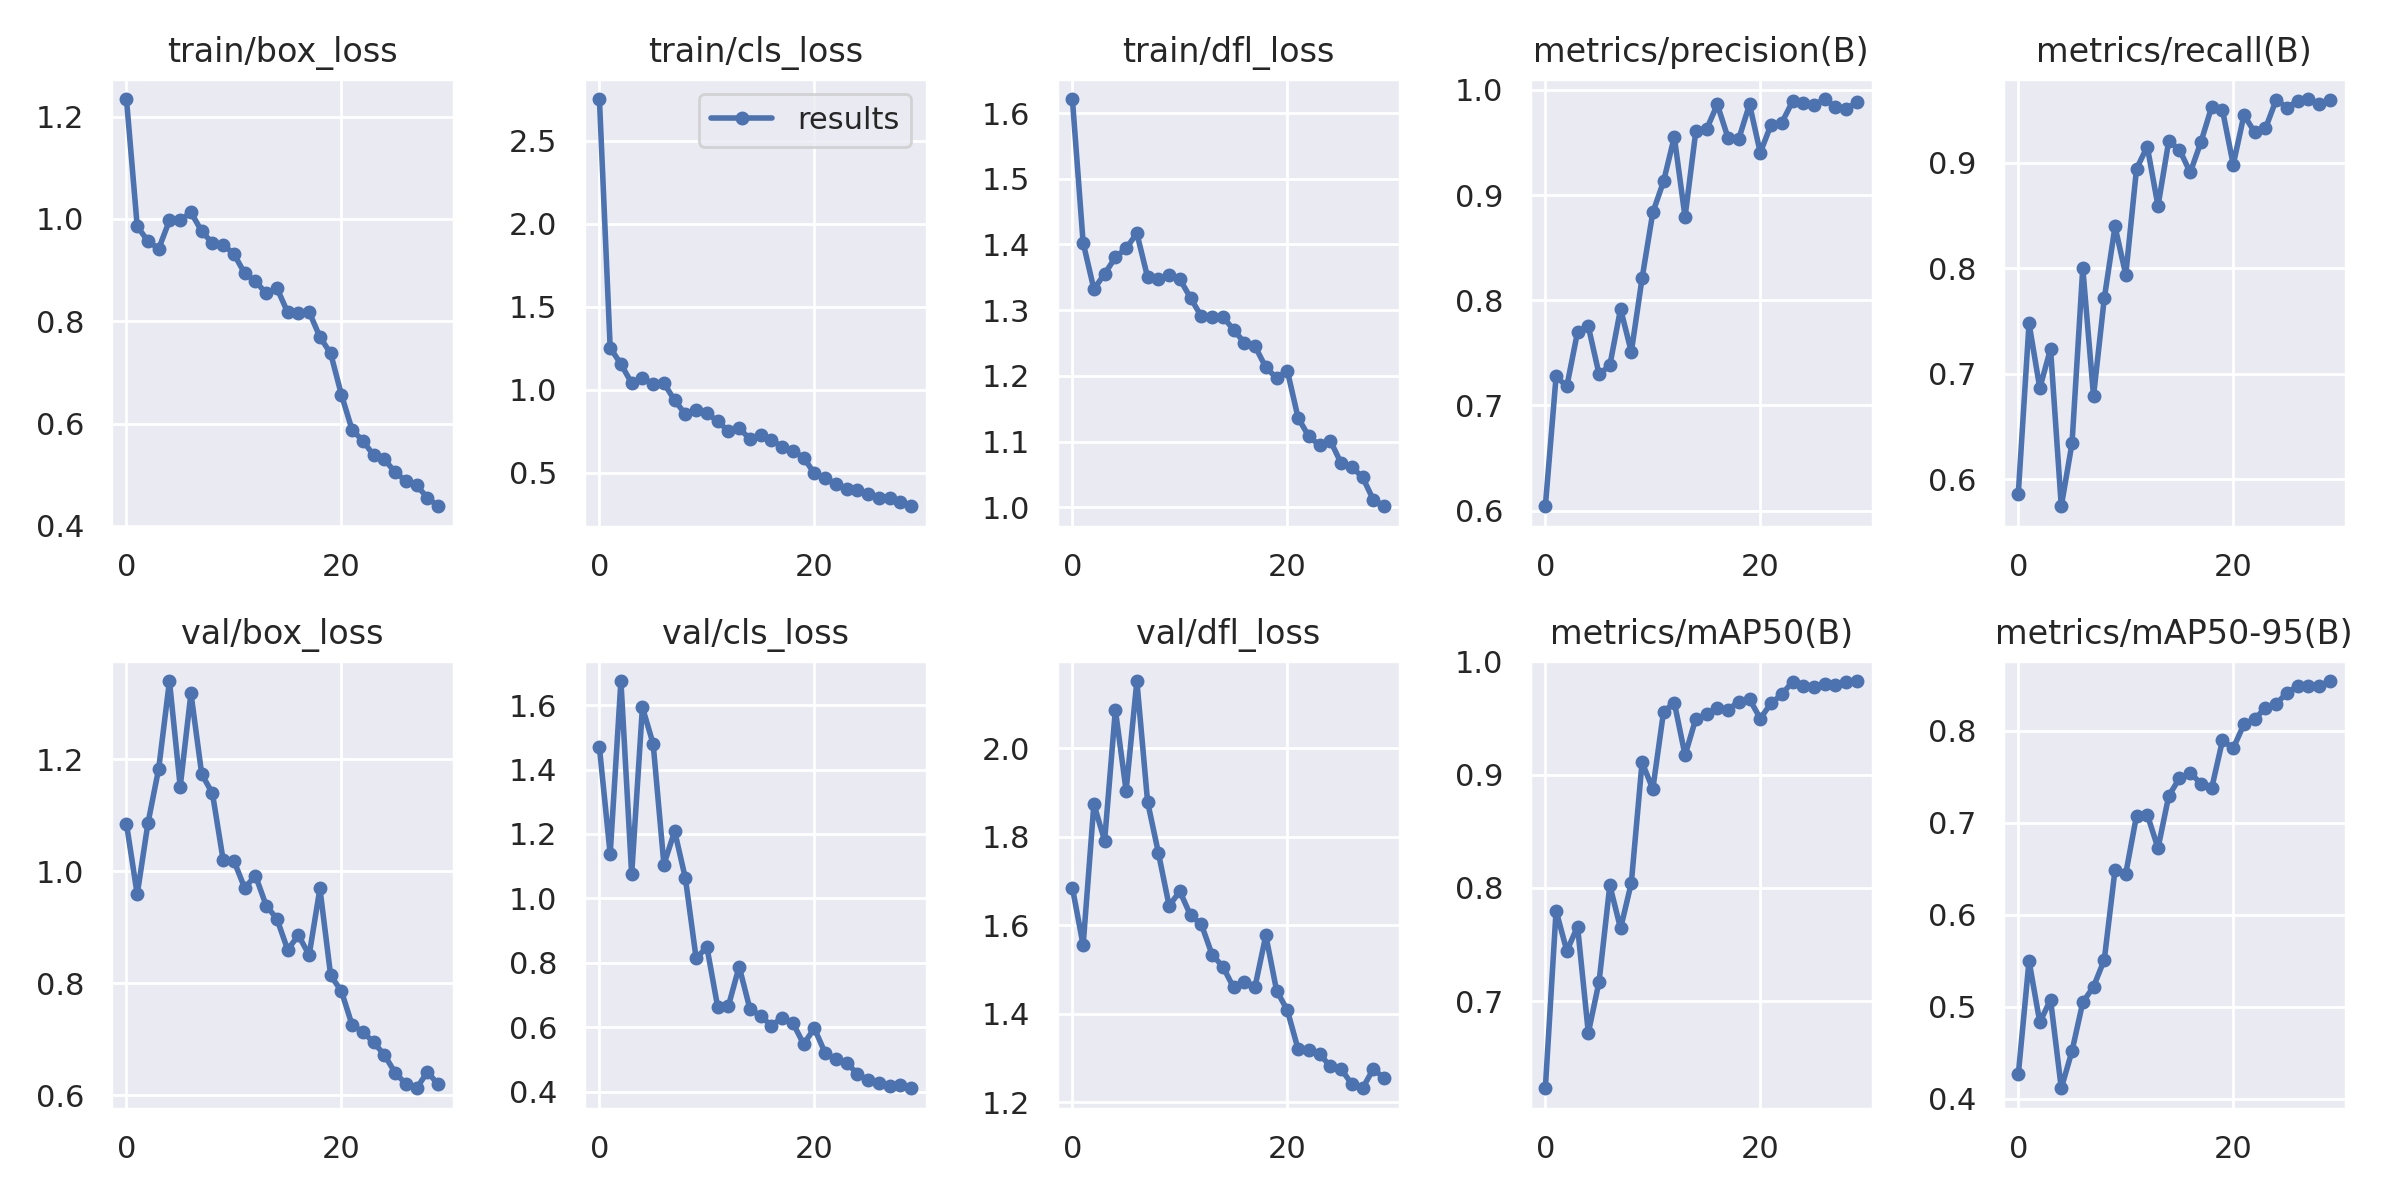

In [31]:
Image(filename=f'/content/datasets/runs/detect/train/results.png', width=600)

In [32]:
!yolo task=detect mode=val model='/content/datasets/runs/detect/train/weights/best.pt' data='/content/datasets/tank_agumentation-1/data.yaml'

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/tank_agumentation-1/valid/labels.cache... 166 images, 0 backgrounds, 0 corrupt: 100% 166/166 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 11/11 [00:03<00:00,  3.07it/s]
                   all        166        189      0.988       0.96      0.983      0.856
                     0        166        103      0.977      0.893      0.958      0.761
                     1        166         45          1      0.985      0.995      0.926
                     2        166         41      0.988          1      0.995      0.881
Speed: 1.3ms pre-process, 8.7ms inference, 0.0ms loss, 3.1ms post-process per image


In [36]:
!yolo task=detect mode=predict model='/content/datasets/runs/detect/train/weights/best.pt' conf=0.25 source='/content/datasets/tank_agumentation-1/test/images' save=True

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
image 1/83 /content/datasets/tank_agumentation-1/test/images/sideup-10-_jpg.rf.a700ea0cc228d593ac90c24781965c86.jpg: 640x640 1 2, 17.1ms
image 2/83 /content/datasets/tank_agumentation-1/test/images/sideup-10-_noised_png.rf.f212f3223f9485c019ffea97eebff883.jpg: 640x640 1 2, 17.1ms
image 3/83 /content/datasets/tank_agumentation-1/test/images/sideup-2-_jpg.rf.48e723d4dc68516d8cb708bcefc6e499.jpg: 640x640 1 2, 17.1ms
image 4/83 /content/datasets/tank_agumentation-1/test/images/sideup-21-_jpg.rf.c340c9d36574b571256a9f20cda10388.jpg: 640x640 1 2, 17.1ms
image 5/83 /content/datasets/tank_agumentation-1/test/images/sideup-25-_inverted_png.rf.5f10969fb87a5578600aa3aab05e03e9.jpg: 640x640 1 2, 14.8ms
image 6/83 /content/datasets/tank_agumentation-1/test/images/sideup-29-_rotated_png.rf.fa03ee10b9a94fda207d8996ea504d7e.jpg: 640x640

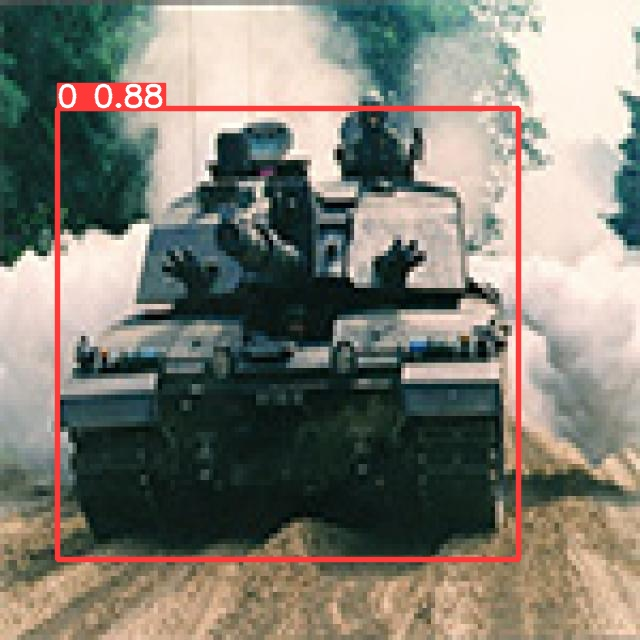

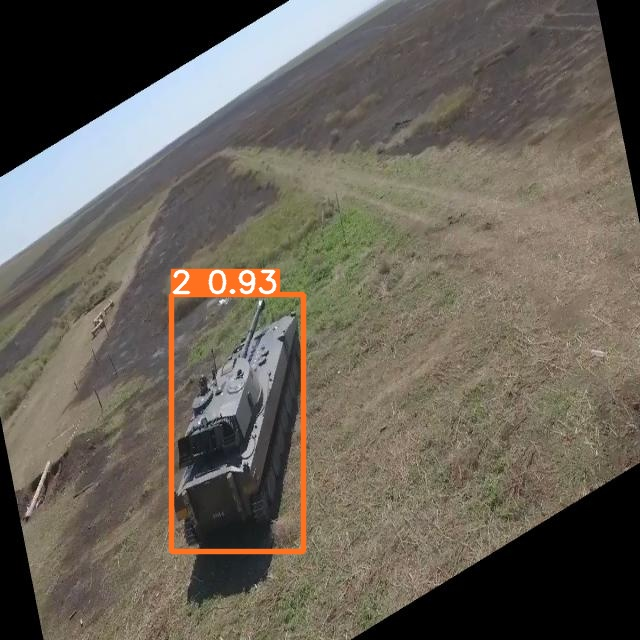

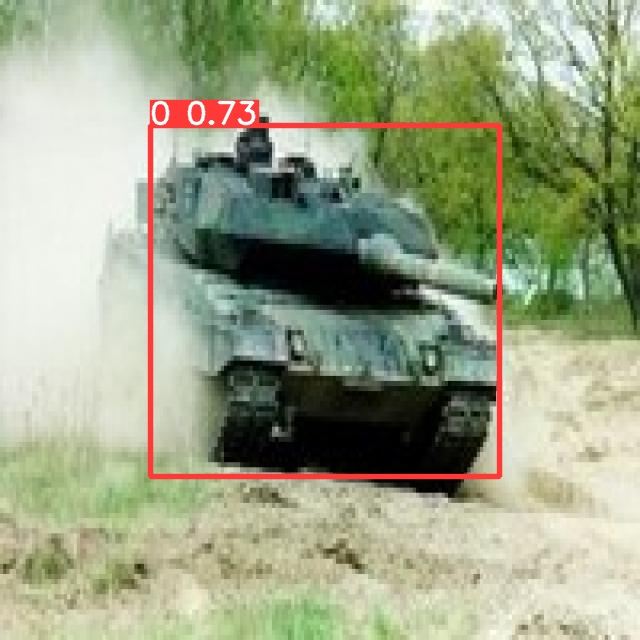

In [37]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/datasets/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [38]:
project.version(1).deploy(model_type="yolov8", model_path="/content/datasets/runs/detect/train/")

Dependency ultralytics<=8.0.20 is required but found version=8.0.38, to fix: `pip install ultralytics<=8.0.20`
View the status of your deployment at: https://app.roboflow.com/korea-national-defense-university/tank_agumentation/deploy/1
Share your model with the world at: https://universe.roboflow.com/korea-national-defense-university/tank_agumentation/model/1


In [35]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [40]:
!yolo task=detect mode=predict model='/content/datasets/runs/detect/train/weights/best.pt' conf=0.25 source='/content/drive/MyDrive/data/tank2.mp4' save=True

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
video 1/1 (1/282) /content/drive/MyDrive/data/tank3.mp4: 384x640 1 0, 6 2s, 14.4ms
video 1/1 (2/282) /content/drive/MyDrive/data/tank3.mp4: 384x640 1 0, 6 2s, 11.4ms
video 1/1 (3/282) /content/drive/MyDrive/data/tank3.mp4: 384x640 1 0, 6 2s, 11.4ms
video 1/1 (4/282) /content/drive/MyDrive/data/tank3.mp4: 384x640 1 0, 6 2s, 11.4ms
video 1/1 (5/282) /content/drive/MyDrive/data/tank3.mp4: 384x640 5 2s, 11.4ms
video 1/1 (6/282) /content/drive/MyDrive/data/tank3.mp4: 384x640 5 2s, 11.4ms
video 1/1 (7/282) /content/drive/MyDrive/data/tank3.mp4: 384x640 5 2s, 11.4ms
video 1/1 (8/282) /content/drive/MyDrive/data/tank3.mp4: 384x640 1 0, 5 2s, 11.4ms
video 1/1 (9/282) /content/drive/MyDrive/data/tank3.mp4: 384x640 1 0, 5 2s, 11.4ms
video 1/1 (10/282) /content/drive/MyDrive/data/tank3.mp4: 384x640 1 0, 5 2s, 11.4ms
video 1/1 (11/28

In [41]:
!yolo task=detect mode=predict model='/content/datasets/runs/detect/train/weights/best.pt' conf=0.25 source='/content/drive/MyDrive/data/tank2.mp4' save=True

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs
video 1/1 (1/725) /content/drive/MyDrive/data/tank2.mp4: 384x640 7 2s, 17.4ms
video 1/1 (2/725) /content/drive/MyDrive/data/tank2.mp4: 384x640 7 2s, 11.6ms
video 1/1 (3/725) /content/drive/MyDrive/data/tank2.mp4: 384x640 7 2s, 11.4ms
video 1/1 (4/725) /content/drive/MyDrive/data/tank2.mp4: 384x640 7 2s, 11.4ms
video 1/1 (5/725) /content/drive/MyDrive/data/tank2.mp4: 384x640 7 2s, 11.5ms
video 1/1 (6/725) /content/drive/MyDrive/data/tank2.mp4: 384x640 7 2s, 11.5ms
video 1/1 (7/725) /content/drive/MyDrive/data/tank2.mp4: 384x640 7 2s, 11.4ms
video 1/1 (8/725) /content/drive/MyDrive/data/tank2.mp4: 384x640 7 2s, 11.4ms
video 1/1 (9/725) /content/drive/MyDrive/data/tank2.mp4: 384x640 7 2s, 11.4ms
video 1/1 (10/725) /content/drive/MyDrive/data/tank2.mp4: 384x640 7 2s, 11.5ms
video 1/1 (11/725) /content/drive/MyDrive/data/tank